# Airline Analysis

In this project, you’ll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:

* *miles:* miles traveled through the flight
* *passengers:* number of passengers on the flight
* *delay:* take-off delay in minutes
* *inflight_meal:* is there a meal included in the flight?
* *inflight_entertainment:* are there free entertainment systems for each seat?
* *inflight_wifi:* is there complimentary wifi on the flight?
* *day_of_week:* day of the week of the flight
* *weekend:* did this flight take place on a weekend
* *coach_price:* the average price paid for a coach ticket
* *firstclass_price:* the average price paid for first-class seats
* *hours:* how many hours the flight took
* *redeye:* was this flight a redeye (overnight)?

In this project, you’ll explore a dataset for the first time and get to know each of these features. Keep in mind that there’s no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

## LOAD DATA

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


In [60]:
min_price = flight['coach_price'].min()
max_price = flight['coach_price'].max()
avg_price = flight['coach_price'].mean()
print(f"Min: ${min_price}, Max: ${max_price}, Avg: ${avg_price:.2f}")

Min: $44.415, Max: $593.635, Avg: $376.59


## TASK #1

What do coach ticket prices look like? What are the high and low values? What would be considered average? Does $500 seem like a good price for a coach ticket?

In [61]:
#Summary statistics
min_price = flight['coach_price'].min()
max_price = flight['coach_price'].max()
avg_price = flight['coach_price'].mean()
print(f"Min: ${min_price}, Max: ${max_price}, Avg: ${avg_price:.2f}")

Min: $44.415, Max: $593.635, Avg: $376.59


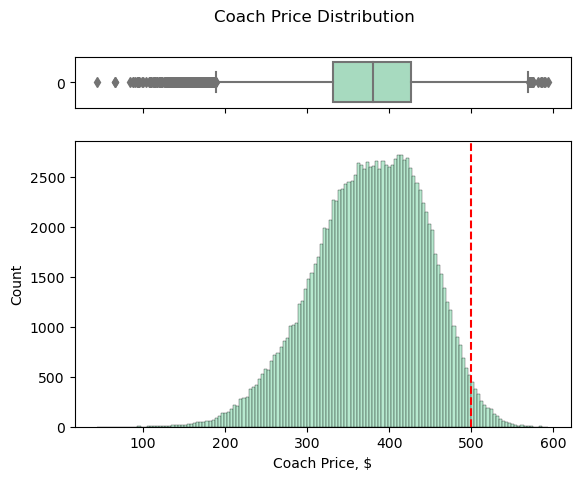

<Figure size 640x480 with 0 Axes>

In [62]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
f.suptitle('Coach Price Distribution')

# assigning a graph to each ax
sns.boxplot(flight['coach_price'], orient="h", ax=ax_box, color = '#9FE2BF')
sns.histplot(data=flight, x='coach_price', ax=ax_hist, color = '#9FE2BF')
plt.axvline(500, color='red', linestyle='--', label='$500')

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_hist.set(xlabel='Coach Price, $')
plt.show()
plt.clf()

**Evaluation:** If $500 is close to the mean or median, it could be considered a reasonable price. However, if it's near the higher end, it might be considered expensive.

## TASK #2

Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 ticket seem more reasonable than before?

In [63]:
# Filter for 8-hour flights
eight_hour_flights = flight[flight['hours'] == 8]

# Summary Statistics
min_price = eight_hour_flights['coach_price'].min()
max_price = eight_hour_flights['coach_price'].max()
avg_price = eight_hour_flights['coach_price'].mean()
print(f"Min: ${min_price}, Max: ${max_price}, Avg: ${avg_price:.2f}")

Min: $170.77, Max: $593.635, Avg: $431.83


In [64]:
def print_mean_coach_prices_by_hour(flight):
    # Convert hours column to integers if it isn't already
    flight['hours'] = flight['hours'].astype(int)

    # Loop through each unique hour in the 'hours' column
    for hour in sorted(flight['hours'].unique()):
        # Filter the DataFrame for flights of that specific hour length
        flights_of_hour = flight[flight['hours'] == hour]

        # Calculate the mean coach price for those flights
        mean_price = flights_of_hour['coach_price'].mean()

        # Print the result in the desired format
        print(f"The mean coach price for {hour} hour flight is ${mean_price:.2f}")

# Print the mean prices for each hour
print_mean_coach_prices_by_hour(flight)

The mean coach price for 1 hour flight is $343.83
The mean coach price for 2 hour flight is $351.96
The mean coach price for 3 hour flight is $368.94
The mean coach price for 4 hour flight is $380.83
The mean coach price for 5 hour flight is $394.09
The mean coach price for 6 hour flight is $404.12
The mean coach price for 7 hour flight is $425.31
The mean coach price for 8 hour flight is $431.83


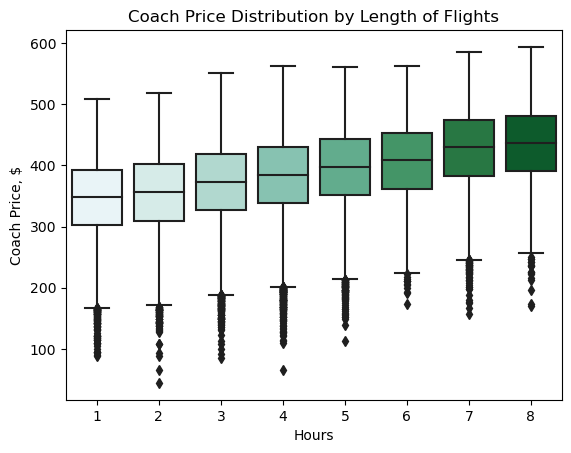

<Figure size 640x480 with 0 Axes>

In [65]:
sns.boxplot(x = 'hours', y = 'coach_price', data = flight, palette = 'BuGn')
plt.title('Coach Price Distribution by Length of Flights')
plt.xlabel('Hours')
plt.ylabel('Coach Price, $')
plt.show()
plt.clf()

**Evaluation:** Compare 500 dollars specifically within the context of 8-hour flights. If the average is lower than $500, the price may not be reasonable for these flights.

## TASK #3

How are flight delay times distributed? Let’s say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

In [66]:
# Summary Statistics
min_delay = flight['delay'].min()
max_delay = flight['delay'].max()
avg_delay = flight['delay'].mean()
median_delay = flight['delay'].median()
print(f"Min: {min_delay} min, Max: {max_delay} min, Avg: {avg_delay:.2f} min, Median: {median_delay} min")

Min: 0 min, Max: 1560 min, Avg: 13.16 min, Median: 10.0 min


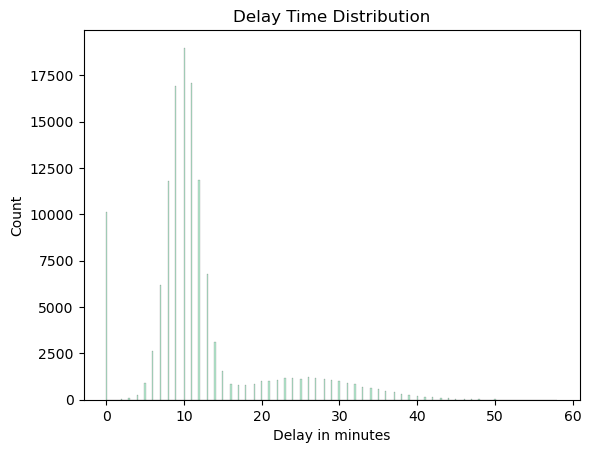

<Figure size 640x480 with 0 Axes>

In [67]:
sns.histplot(flight.delay[flight.delay<100], color = '#9FE2BF')
plt.title('Delay Time Distribution')
plt.xlabel('Delay in minutes')
plt.show()
plt.clf()

## TASK #4

Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

C:\Users\potap\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


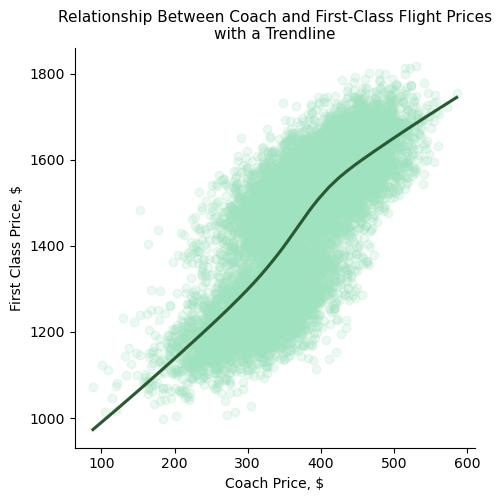

<Figure size 640x480 with 0 Axes>

In [68]:
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))
 
sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, scatter_kws={'color': '#9FE2BF', 'alpha': 0.2}, line_kws={'color': '#2a5a32'}, lowess=True)
plt.title('Relationship Between Coach and First-Class Flight Prices\nwith a Trendline', fontsize=11)
plt.xlabel('Coach Price, $')
plt.ylabel('First Class Price, $')
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.15, right=0.95)
plt.show()
plt.clf()

## TASK #5

What is the relationship between coach prices and inflight features— inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

In [69]:
#create correlation matrix

flight['inflight_meal'] = flight['inflight_meal'].map({'Yes': 1, 'No': 0})
flight['inflight_wifi'] = flight['inflight_wifi'].map({'Yes': 1, 'No': 0})
flight['inflight_entertainment'] = flight['inflight_entertainment'].map({'Yes': 1, 'No': 0})

print(flight[['coach_price', 'inflight_meal', 'inflight_wifi', 'inflight_entertainment']].nunique())

corr_matrix = flight[['coach_price', 'inflight_meal', 'inflight_wifi', 'inflight_entertainment']].corr()
print(corr_matrix)

print(flight[['coach_price', 'inflight_meal', 'inflight_wifi', 'inflight_entertainment']].isna().sum())

coach_price               49306
inflight_meal                 2
inflight_wifi                 2
inflight_entertainment        2
dtype: int64
                        coach_price  inflight_meal  inflight_wifi  \
coach_price                1.000000       0.130679       0.312437   
inflight_meal              0.130679       1.000000      -0.000475   
inflight_wifi              0.312437      -0.000475       1.000000   
inflight_entertainment     0.412481       0.004179      -0.000279   

                        inflight_entertainment  
coach_price                           0.412481  
inflight_meal                         0.004179  
inflight_wifi                        -0.000279  
inflight_entertainment                1.000000  
coach_price               0
inflight_meal             0
inflight_wifi             0
inflight_entertainment    0
dtype: int64


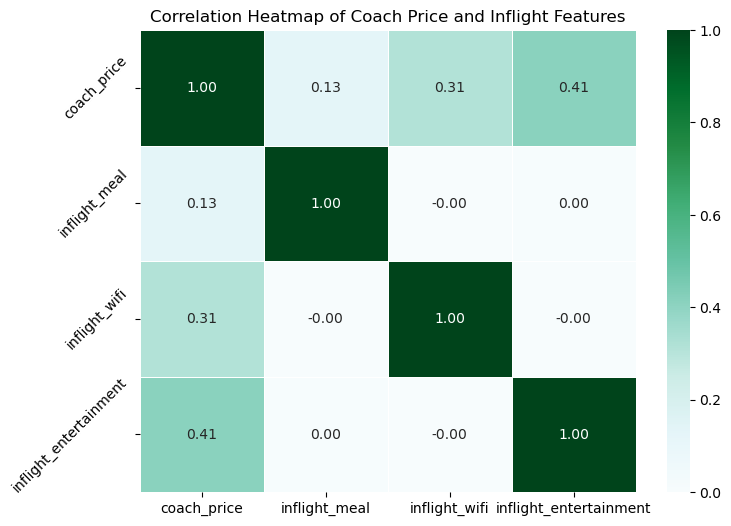

In [70]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='BuGn', fmt='.2f', linewidths=0.5)
plt.yticks(rotation=45)  # Rotate y-axis labels by 45 degrees
plt.title('Correlation Heatmap of Coach Price and Inflight Features')
plt.show()

## TASK #6

How does the number of passengers change in relation to the length of flights?

C:\Users\potap\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


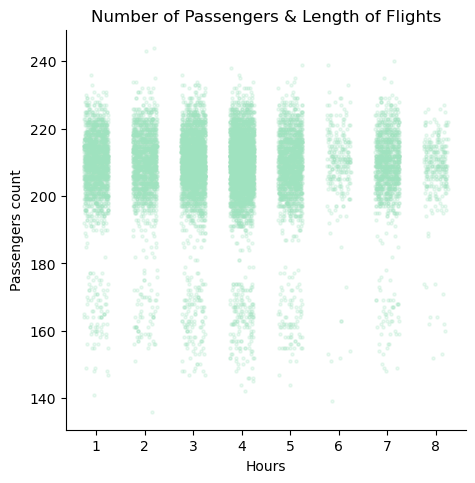

<Figure size 640x480 with 0 Axes>

In [71]:
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={'color': '#9FE2BF', "s": 5, "alpha":0.2}, fit_reg = False)
plt.title('Number of Passengers & Length of Flights')
plt.xlabel('Hours')
plt.ylabel('Passengers count')
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.15, right=0.95)
plt.show()
plt.clf()

## TASK #7

Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

C:\Users\potap\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


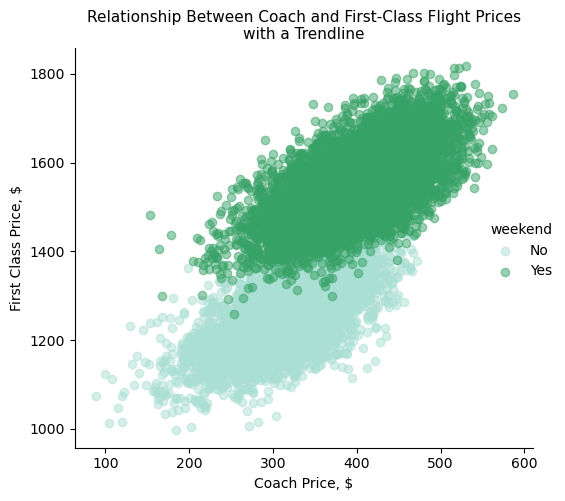

<Figure size 640x480 with 0 Axes>

In [72]:
sns.lmplot(x = "coach_price", y = "firstclass_price", hue  = 'weekend', data = flight_sub, palette='BuGn', fit_reg=False, scatter_kws={'alpha': 0.5})
plt.title('Relationship Between Coach and First-Class Flight Prices\nwith a Trendline', fontsize=11)
plt.xlabel('Coach Price, $')
plt.ylabel('First Class Price, $')
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.15, right=0.95)
plt.show()
plt.clf()

## TASK #8

How do coach prices differ for redeyes and non-redeyes on each day of the week?

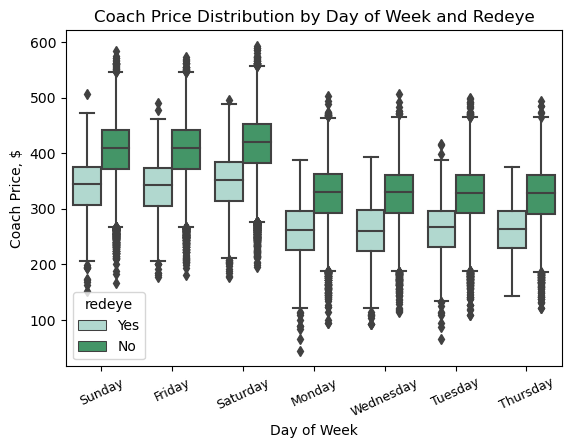

<Figure size 640x480 with 0 Axes>

In [73]:
sns.boxplot(x = 'day_of_week', y = 'coach_price', hue = 'redeye', data = flight, palette = 'BuGn')
plt.title('Coach Price Distribution by Day of Week and Redeye')
plt.xticks(fontsize = 9, rotation = 25)
plt.xlabel('Day of Week')
plt.ylabel('Coach Price, $')
plt.subplots_adjust(top=0.85, bottom=0.15)
plt.show()
plt.clf()